<a href="https://colab.research.google.com/github/Altaieb-Mohammed/pytorch-tutorial-YouTube-/blob/main/lab1m%20analisiss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://github.com/Altaieb-Mohammed/pytorch-tutorial-YouTube-/raw/main/synthetic_inheritance_data.csv"

df = pd.read_csv(url)
print(df.head(6))


                                                text      debts  \
0  The estate is worth $801,536.08. There are deb...  136423.38   
1  The estate is worth $943,375.41. There are deb...  178819.05   
2  The estate is worth $678,251.95. There are deb...  137791.13   
3  The estate is worth $364,967.06. There are deb...   74310.09   
4  The estate is worth $663,414.47. There are deb...    2302.81   
5  The estate is worth $152,855.39. There are deb...     454.23   

   funeral_expenses   bequests  wife  husband  son  daughter  father  mother  \
0           7866.29   70554.96     1        0    5         4       0       0   
1           9078.99  150491.37     1        1    4         5       0       1   
2           6276.24   19846.02     1        1    3         5       0       0   
3           9243.89   81648.92     0        0    4         0       0       0   
4           7015.85   15827.62     1        1    3         2       1       0   
5           7859.73    1920.94     0        1    0

In [ ]:
#---------------------------------------------------------- Лабораторная работа №1:

# --- Загрузить данные из GitHub----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
url = "https://github.com/Altaieb-Mohammed/pytorch-tutorial-YouTube-/raw/main/synthetic_inheritance_data.csv"

df = pd.read_csv(url)

# --- проверка признаков----------------------------------------------------------------------------------------------------------------------------------------------------------------
print("Columns:", df.columns.tolist())

# Использование реальных имен столбцов из нашего набора данных----------------------------------------------------------------------------------------------------------------------------------------------------
numeric_features = [
    'debts', 'funeral_expenses', 'bequests', 'wife', 'husband', 'son', 'daughter',
    'father', 'mother', 'brother', 'sister', 'grandchild'
]

# ---  Чистые данные---
# Удалить строки с отсутствующими значениями в числовых столбцах------------------------------------------------------------------------------------------------------------------------------------------------
df_clean = df[numeric_features].dropna()

# удалить строки с неположительными значениями в финансовых столбцах.----------------------------------------------------------------------------------------------------------------------------------------------
for col in ['debts', 'funeral_expenses', 'bequests']:
    df_clean = df_clean[df_clean[col] > 0]

# --- Масштабирование ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(
    minmax_scaler.fit_transform(df_clean),
    columns=numeric_features
)

# Standard Scaling------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
standard_scaler = StandardScaler()
df_standard = pd.DataFrame(
    standard_scaler.fit_transform(df_clean),
    columns=numeric_features
)

# ---  результаты  ------------------------------------------------------------------------------------------------------------
df_clean.to_csv('inheritance_cleaned.csv', index=False)
df_minmax.to_csv('inheritance_minmax_scaled.csv', index=False)
df_standard.to_csv('inheritance_standard_scaled.csv', index=False)

# ---  Preview ---------------------------------------------------------------------------------------------  Preview------------------------------------------------------------------------------------------------------
print("Cleaned data:\n", df_clean.head())
print("MinMax scaled:\n", df_minmax.head())
print("Standard scaled:\n", df_standard.head())


Columns: ['text', 'debts', 'funeral_expenses', 'bequests', 'wife', 'husband', 'son', 'daughter', 'father', 'mother', 'brother', 'sister', 'grandchild']
Cleaned data:
        debts  funeral_expenses   bequests  wife  husband  son  daughter  \
0  136423.38           7866.29   70554.96     1        0    5         4   
1  178819.05           9078.99  150491.37     1        1    4         5   
2  137791.13           6276.24   19846.02     1        1    3         5   
3   74310.09           9243.89   81648.92     0        0    4         0   
4    2302.81           7015.85   15827.62     1        1    3         2   

   father  mother  brother  sister  grandchild  
0       0       0        2       0           2  
1       0       1        2       3           2  
2       0       0        2       2           1  
3       0       0        1       3           2  
4       1       0        2       3           2  
MinMax scaled:
       debts  funeral_expenses  bequests  wife  husband  son  daughter  f

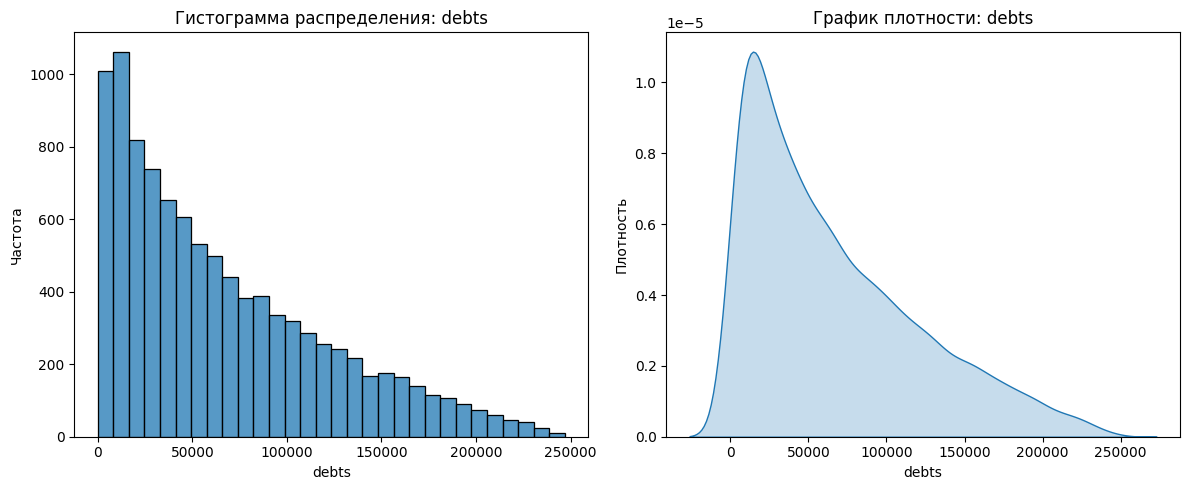

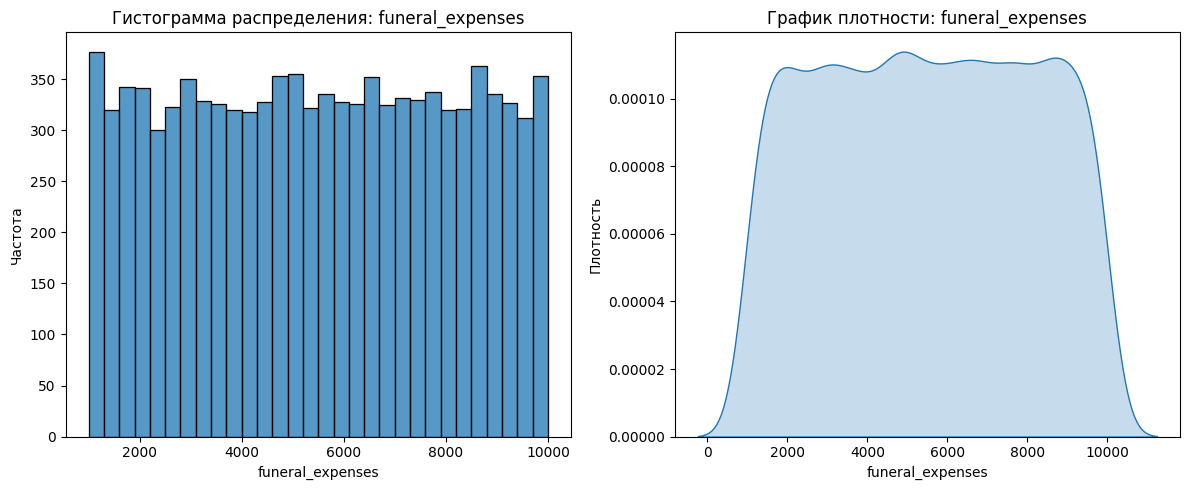

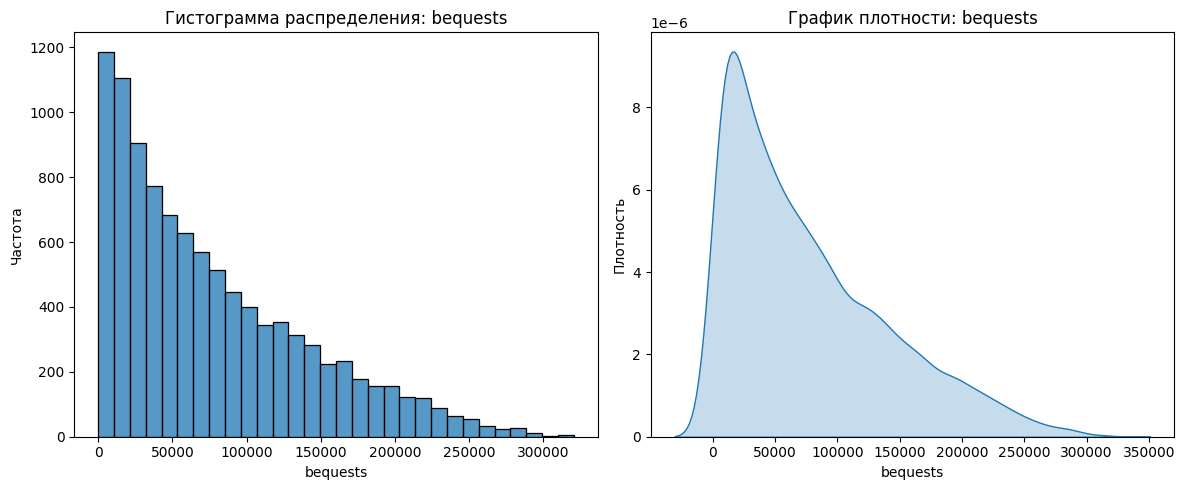

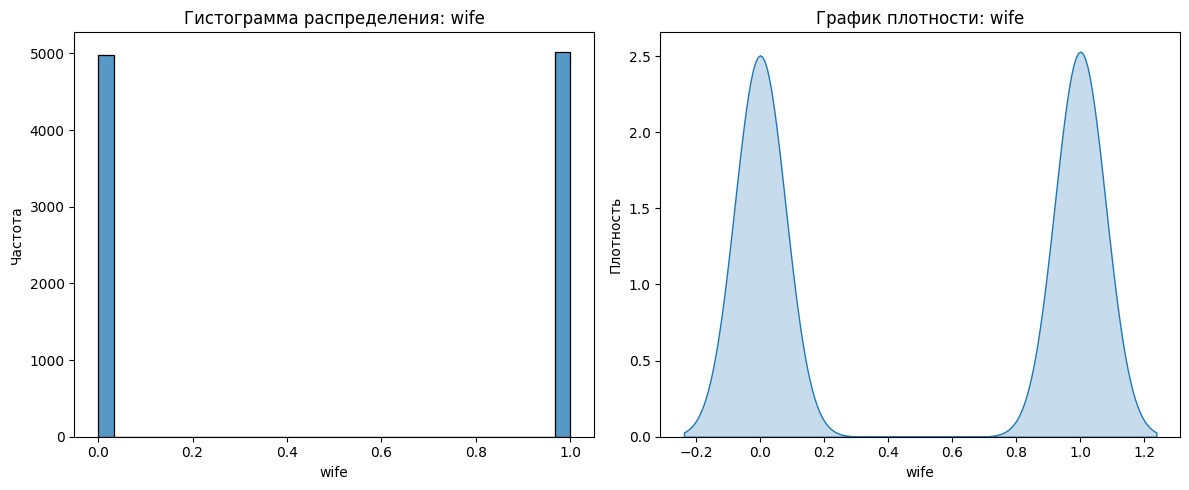

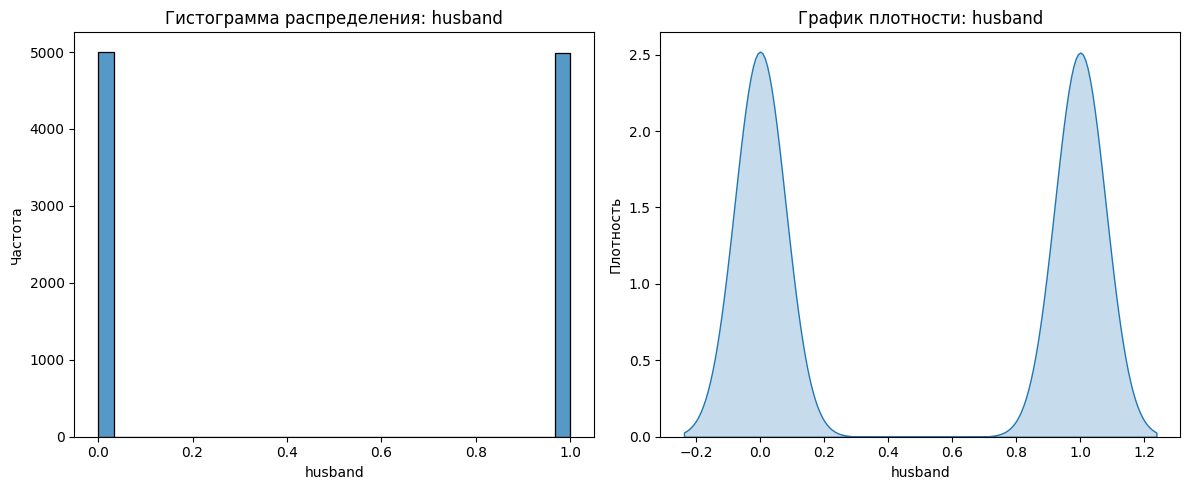

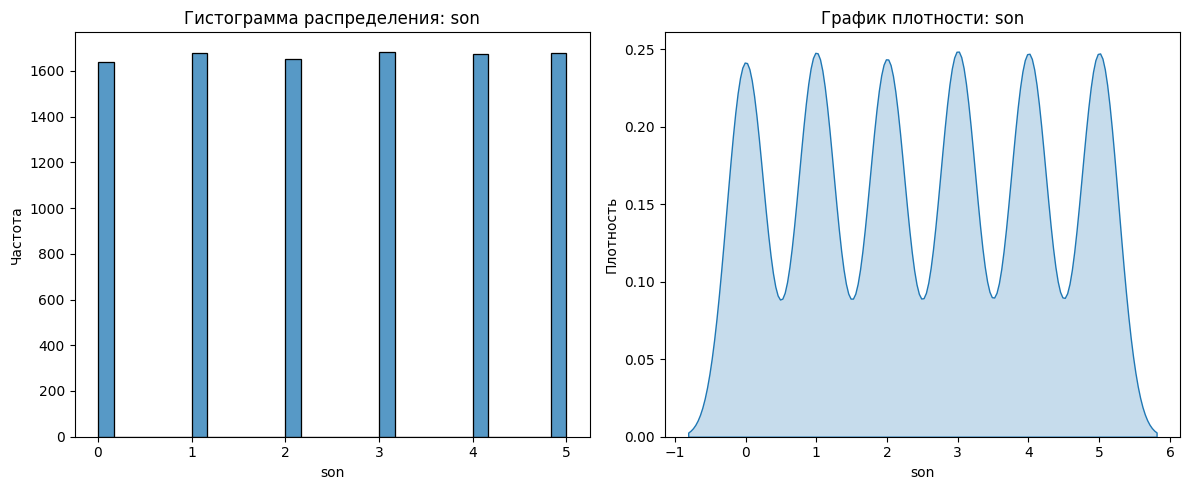

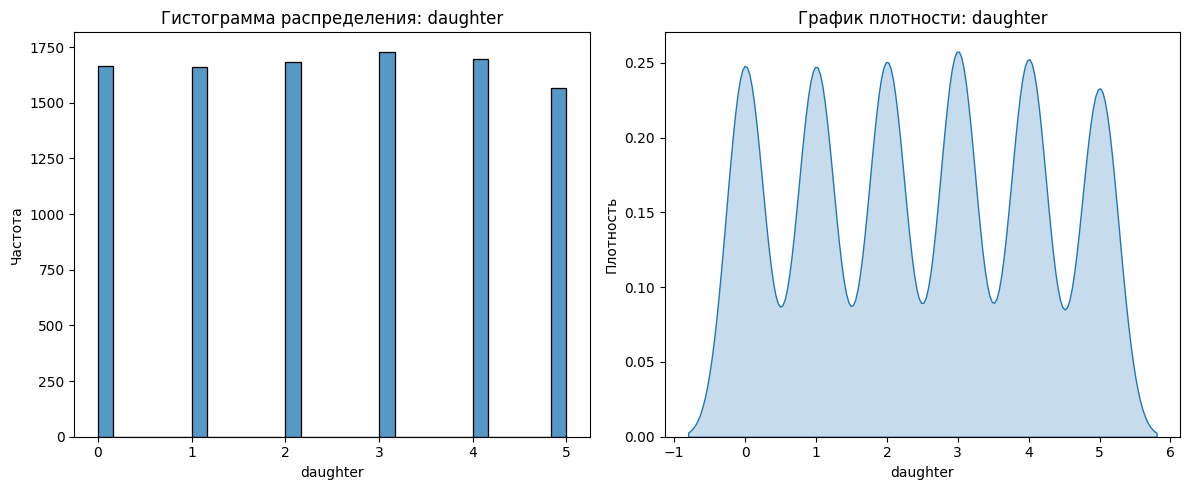

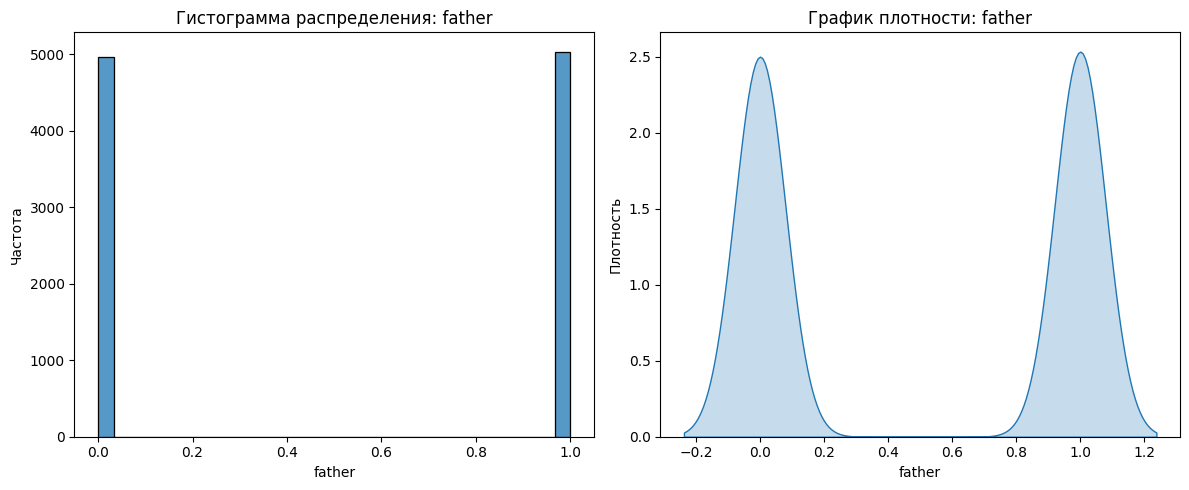

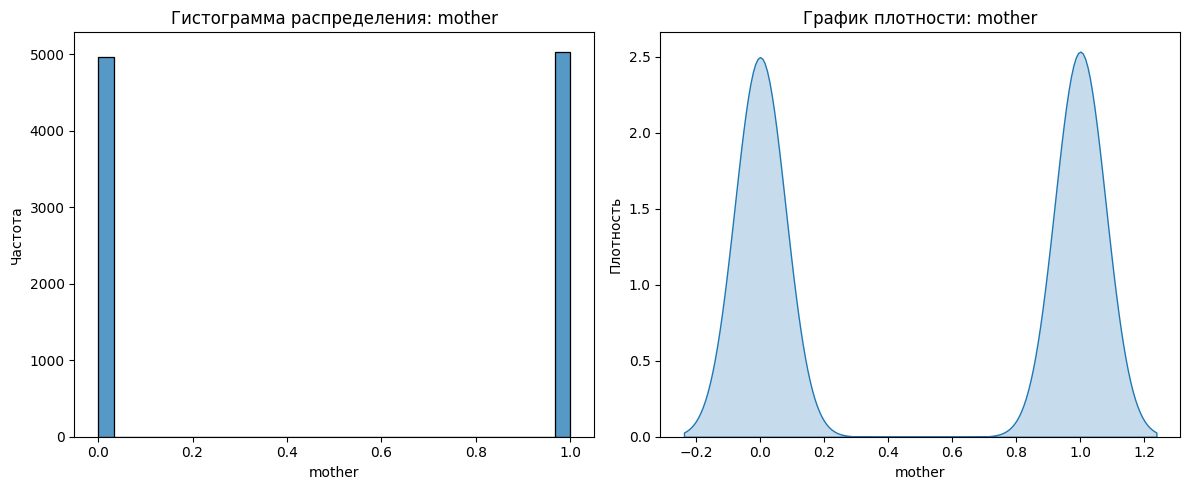

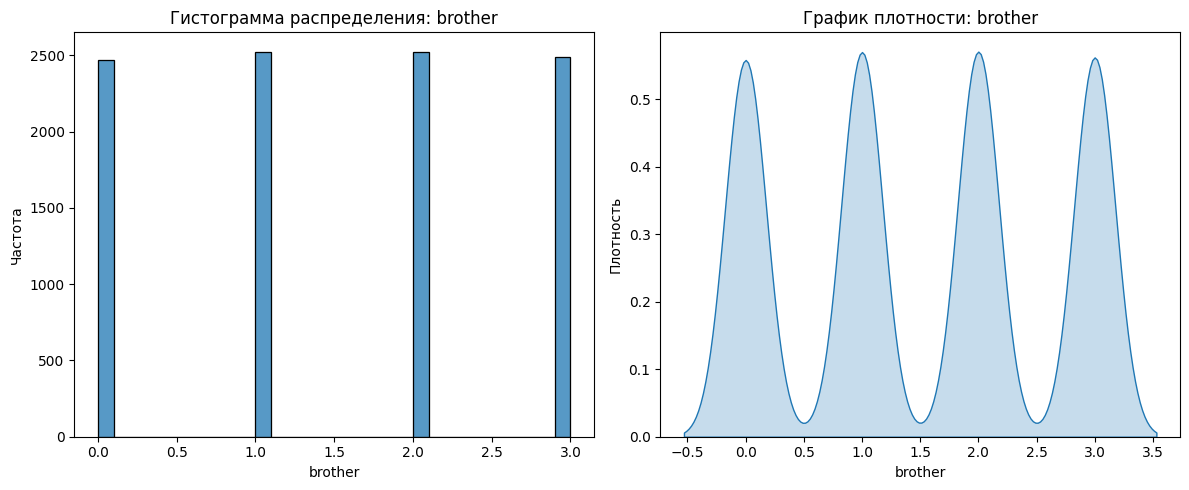

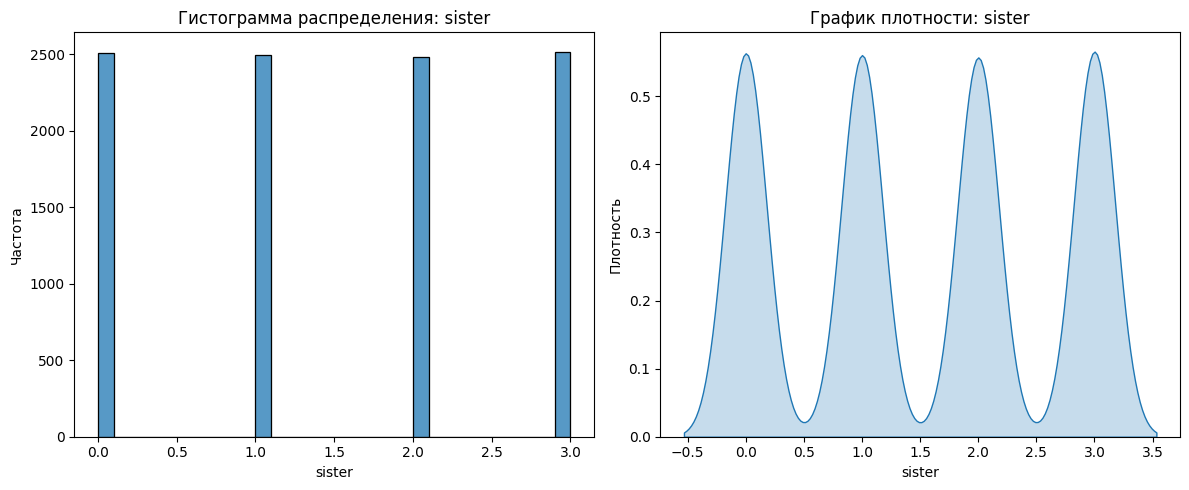

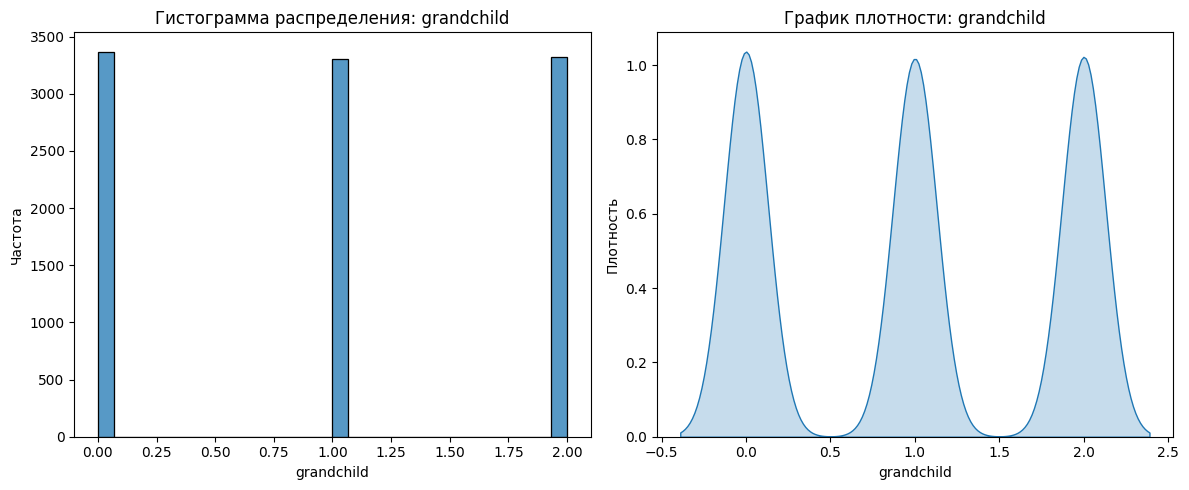

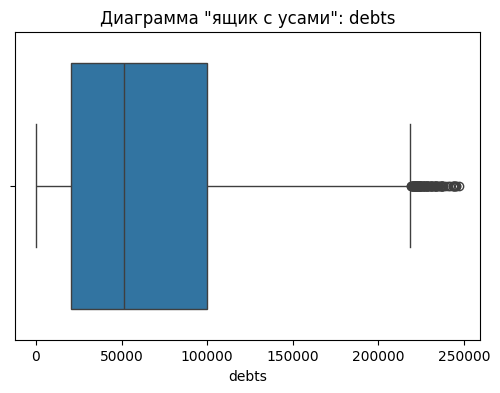

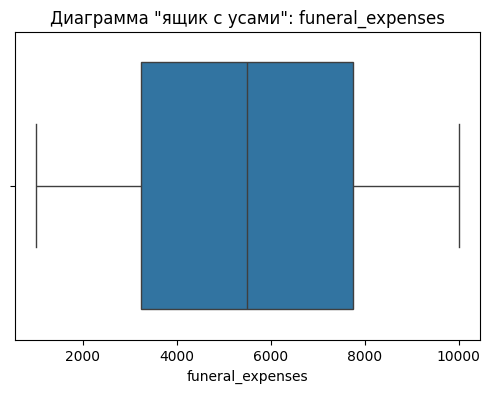

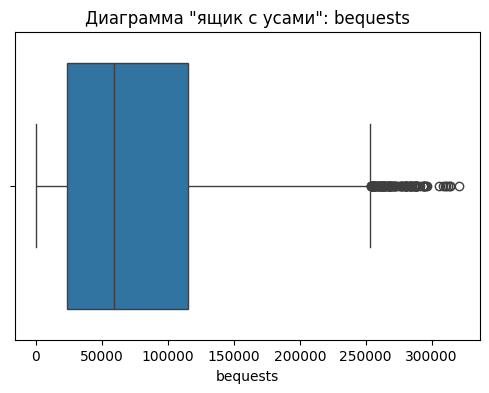

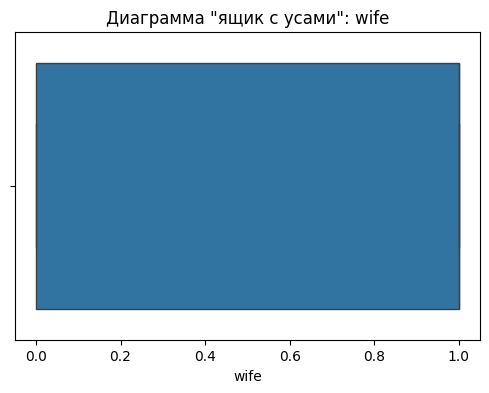

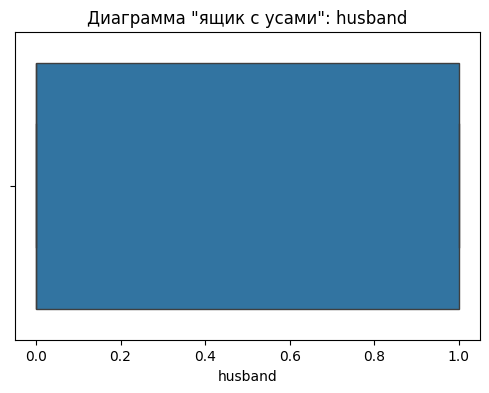

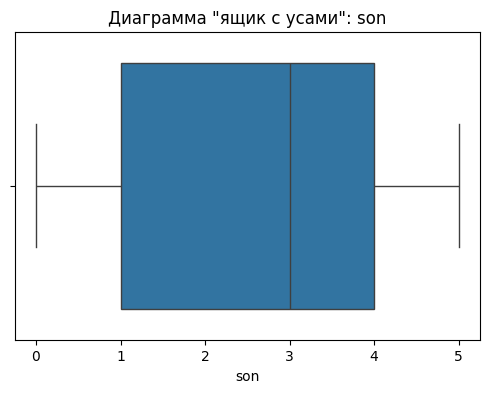

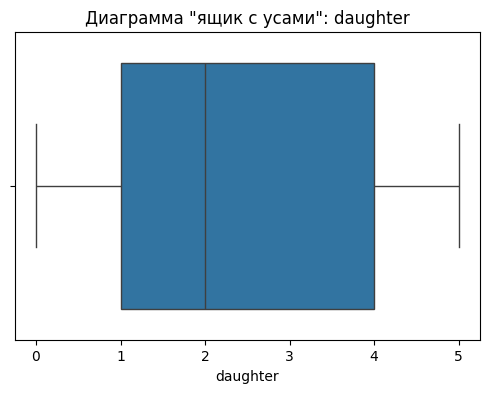

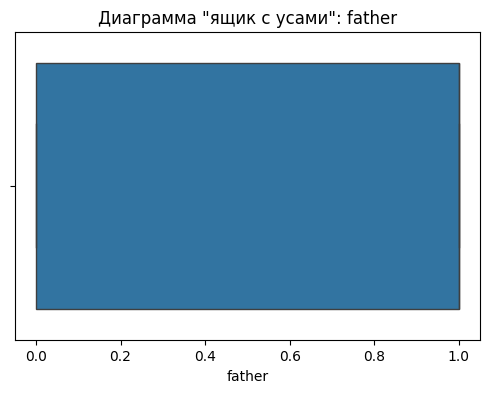

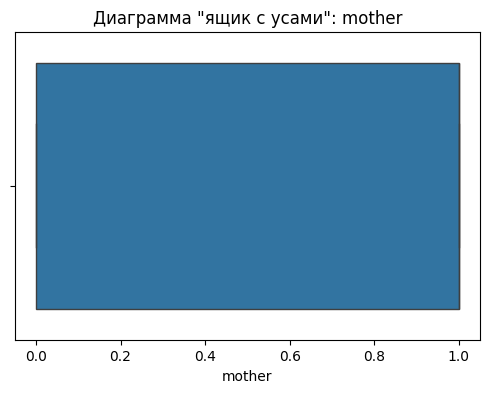

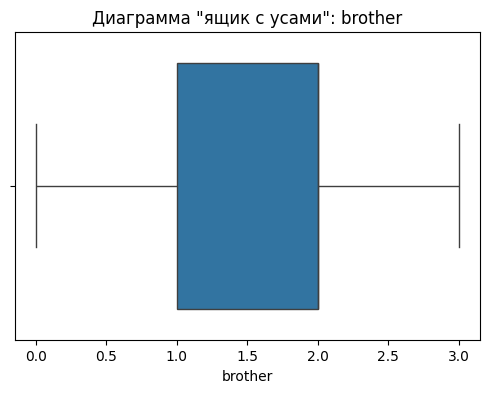

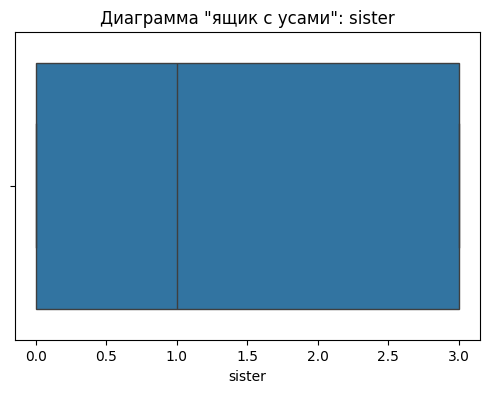

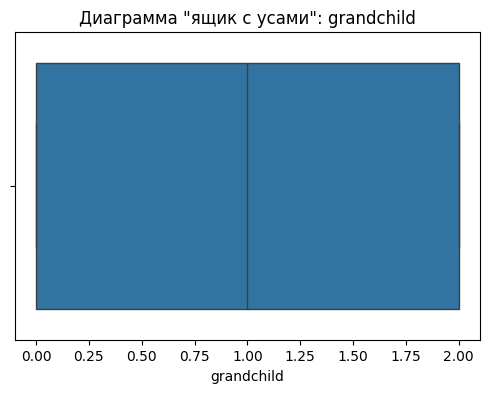


Примеры текстовых описаний:
0    The estate is worth $801,536.08. There are deb...
1    The estate is worth $943,375.41. There are deb...
2    The estate is worth $678,251.95. There are deb...
3    The estate is worth $364,967.06. There are deb...
4    The estate is worth $663,414.47. There are deb...
Name: text, dtype: object


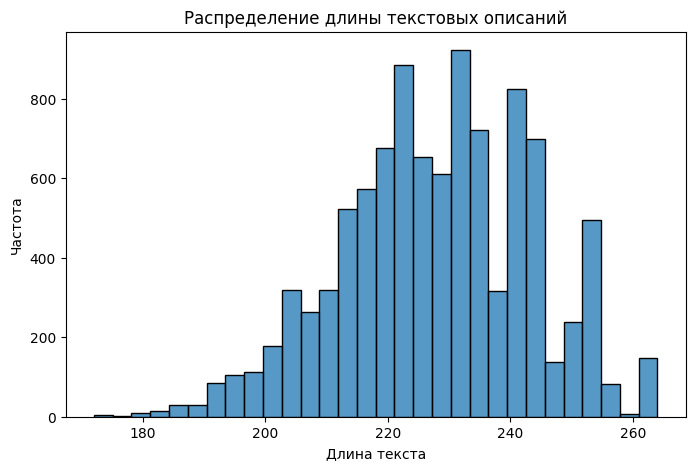

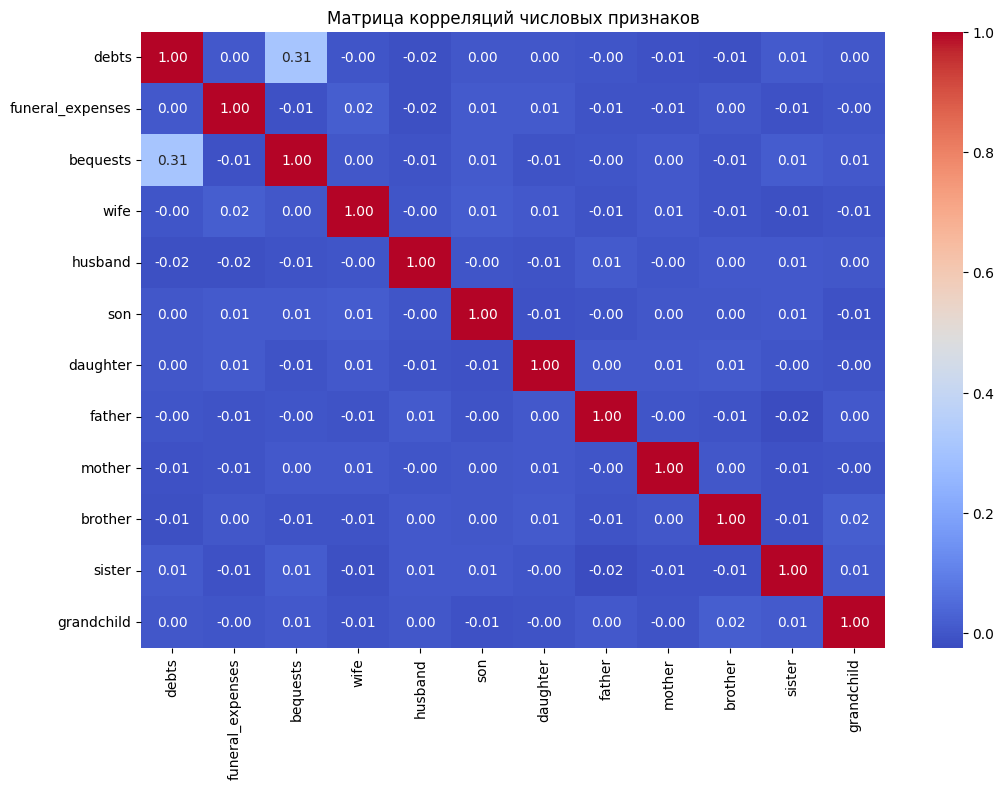

Краткие статистики по числовым признакам:
                debts  funeral_expenses       bequests          wife  \
count   10000.000000      10000.000000   10000.000000  10000.000000   
mean    66114.075550       5494.843407   76554.941016      0.502400   
std     55033.920158       2605.665586   64457.475334      0.500019   
min         2.130000       1000.030000      24.520000      0.000000   
25%     20566.652500       3237.277500   23697.625000      0.000000   
50%     51260.270000       5495.665000   59067.190000      1.000000   
75%     99795.077500       7742.445000  115633.610000      1.000000   
max    246943.130000       9999.530000  320499.220000      1.000000   

            husband          son      daughter        father        mother  \
count  10000.000000  10000.00000  10000.000000  10000.000000  10000.000000   
mean       0.499400      2.51110      2.482200      0.503300      0.503600   
std        0.500025      1.70557      1.691085      0.500014      0.500012   
min  

In [10]:
# --------------------------------------------------------------Лабораторная работа №2: Анализ распределений и корреляций
# ---  Загрузка данных ---
url = "https://github.com/Altaieb-Mohammed/pytorch-tutorial-YouTube-/raw/main/synthetic_inheritance_data.csv"
df = pd.read_csv(url)
# ---  Определение числовых и категориальных признаков -----------------------------------------------------------------------------------------------------------------------------------------------------------
# Числовые признаки (финансовые и количественные)
numerical_features = [
    'debts', 'funeral_expenses', 'bequests', 'wife', 'husband', 'son', 'daughter',
    'father', 'mother', 'brother', 'sister', 'grandchild'
]

# Категориальные признаки (в данном датасете только текстовое описание)--------------------------------------------------------------------------------------------------------------------------------------------------------
categorical_features = ['text']

# ---  Очистка числовых данных от пропусков -----------------------------------------------------------------------------------------------------------------------------------------------------------
df_num = df[numerical_features].dropna()

# ---  Анализ распределения числовых признаков -----------------------------------------------------------------------------------------------------------------------------------------------------------
for feature in numerical_features:
    plt.figure(figsize=(12, 5))

    # Гистограмма распределения--------------------------------------------------------------------------------------------------------------------------------------------------------
    plt.subplot(1, 2, 1)
    sns.histplot(df_num[feature], bins=30, kde=False)
    plt.title(f'Гистограмма распределения: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

    # График плотности--------------------------------------------------------------------------------------------------------------------------------------------------------
    plt.subplot(1, 2, 2)
    sns.kdeplot(df_num[feature], fill=True)
    plt.title(f'График плотности: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Плотность')

    plt.tight_layout()
    plt.show()

# ---  Диаграммы "ящик с усами" для выявления выбросов -----------------------------------------------------------------------------------------------------------------------------------------------------------
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_num[feature])
    plt.title(f'Диаграмма "ящик с усами": {feature}')
    plt.xlabel(feature)
    plt.show()

# --- Анализ распределения категориальных признаков -----------------------------------------------------------------------------------------------------------------------------------------------------------
# Для текстового поля можно вывести несколько примеров и длину текста
print("\nПримеры текстовых описаний:")
print(df['text'].head(5))
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=30)
plt.title('Распределение длины текстовых описаний')
plt.xlabel('Длина текста')
plt.ylabel('Частота')
plt.show()

# ---  Анализ взаимосвязей (корреляций) числовых признаков -----------------------------------------------------------------------------------------------------------------------------------------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций числовых признаков')
plt.show()

# --- Краткие выводы ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print("Краткие статистики по числовым признакам:\n", df_num.describe())

# Пример анализа:
# - Высокая корреляция между количеством сыновей и дочерей может указывать на большие семьи.
# - Финансовые признаки (долги, расходы на похороны, завещания) могут быть скоррелированы между собой.
# - Выбросы в признаках debts, bequests и funeral_expenses могут указывать на редкие, но крупные случаи.

